In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import xarray as xr
from calendar import monthrange

In [2]:
#basic rmse function
def calc_rmse(column_a, column_b):
    return np.power(np.nanmean(((column_a - column_b) ** 2)), .5)

In [3]:
#path to station observations
path_to_ec_obs = '/data/comparison_data/US-Prr-ec-daily.csv'
path_to_met_data = '/data/comparison_data/poker_flats_2010-2022_daily.csv'

#netCDF coordinates to extract data from
#poker flats
cell_x_coord = 1
cell_y_coord = 0

In [4]:
met_data = pd.read_csv(path_to_met_data)
met_data['date'] = pd.to_datetime(met_data['date'])
met_data = met_data.replace(-9999.0, np.nan)
met_data.head()

,date,"('TIMESTAMP_START', 'mean')","('TIMESTAMP_START', 'std')","('TIMESTAMP_START', 'sum')","('TIMESTAMP_END', 'mean')","('TIMESTAMP_END', 'std')","('TIMESTAMP_END', 'sum')","('USTAR_1_1_1', 'mean')","('USTAR_1_1_1', 'std')","('USTAR_1_1_1', 'sum')",...,"('FC_F_1_2_1', 'sum')","('GPP_1_2_1', 'mean')","('GPP_1_2_1', 'std')","('GPP_1_2_1', 'sum')","('RECO_1_2_1', 'mean')","('RECO_1_2_1', 'std')","('RECO_1_2_1', 'sum')","('year', 'mean')","('year', 'std')","('year', 'sum')"
0,2010-01-01,2.010010e+11,699.708147,9648048535920,2.010010e+11,1441.242567,9648048545920,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0
1,2010-01-02,2.010010e+11,699.708147,9648049015920,2.010010e+11,1441.242567,9648049025920,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0
2,2010-01-03,2.010010e+11,699.708147,9648049495920,2.010010e+11,1441.242567,9648049505920,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0
3,2010-01-04,2.010010e+11,699.708147,9648049975920,2.010010e+11,1441.242567,9648049985920,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0
4,2010-01-05,2.010011e+11,699.708147,9648050455920,2.010011e+11,1441.242567,9648050465920,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0


In [5]:
## aggregate ec data monthly
met_data['year'] = pd.DatetimeIndex(met_data['date']).year
met_data = met_data[met_data['year']>=2012]
met_data['month'] = pd.DatetimeIndex(met_data['date']).month # get month from datetime

#group by year and month, taking sum of daily ec measurements
met_data = met_data.groupby(by=['year', 'month'], dropna=True).mean().reset_index() 

#create datetime column for just month and year
met_data['m_y'] = pd.to_datetime(met_data['month'].astype(str) + '-'+ met_data['year'].astype(str), format='%m-%Y') 

met_data.head(5)

,year,month,"('TIMESTAMP_START', 'mean')","('TIMESTAMP_START', 'std')","('TIMESTAMP_START', 'sum')","('TIMESTAMP_END', 'mean')","('TIMESTAMP_END', 'std')","('TIMESTAMP_END', 'sum')","('USTAR_1_1_1', 'mean')","('USTAR_1_1_1', 'std')",...,"('GPP_1_2_1', 'mean')","('GPP_1_2_1', 'std')","('GPP_1_2_1', 'sum')","('RECO_1_2_1', 'mean')","('RECO_1_2_1', 'std')","('RECO_1_2_1', 'sum')","('year', 'mean')","('year', 'std')","('year', 'sum')",m_y
0,2012,1,2.012012e+11,699.708147,9.657656e+12,2.012012e+11,4648.520125,9.657656e+12,0.234325,0.087609,...,0.027015,0.026692,1.296717,0.173824,0.045823,8.343561,0.0,0.0,0.0,2012-01-01
1,2012,2,2.012022e+11,699.708147,9.657703e+12,2.012022e+11,4969.252643,9.657703e+12,0.194547,0.079434,...,0.063084,0.050016,3.028028,0.207961,0.055515,9.982135,0.0,0.0,0.0,2012-02-01
2,2012,3,2.012032e+11,699.708147,9.657752e+12,2.012032e+11,4648.520125,9.657752e+12,0.218147,0.116785,...,0.090094,0.073553,4.324491,0.162994,0.066264,7.823731,0.0,0.0,0.0,2012-03-01
3,2012,4,2.012042e+11,699.708147,9.657799e+12,2.012042e+11,4803.540827,9.657800e+12,0.255604,0.129685,...,0.295702,0.365346,14.193715,1.222267,0.450168,58.668807,0.0,0.0,0.0,2012-04-01
4,2012,5,2.012052e+11,699.708147,9.657848e+12,2.012052e+11,4648.520125,9.657848e+12,0.260089,0.140420,...,2.126200,1.355544,102.057585,1.870086,0.595672,89.764123,0.0,0.0,0.0,2012-05-01


In [6]:
ec_data=pd.read_csv(path_to_ec_obs)
ec_data = ec_data.replace(-9999.0, np.nan)
ec_data['date'] = pd.to_datetime(ec_data['date'])
ec_data.head()

,Unnamed: 0,Year,DOY,H_filled,LE_filled,NEE_filled,GPP_filled,RE_filled,SW_IN,SW_OUT,LW_IN,LW_OUT,Rn,G,date
0,1,2010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
1,2,2010,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-02
2,3,2010,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-03
3,4,2010,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04
4,5,2010,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-05


In [7]:
## aggregate ec data monthly
ec_data['month'] = pd.DatetimeIndex(ec_data['date']).month # get month from datetime

#group by year and month, taking sum of daily ec measurements
ec_data = ec_data.groupby(by=['Year', 'month']).sum().reset_index() 

#create datetime column for just month and year
ec_data['m_y'] = pd.to_datetime(ec_data['month'].astype(str) + '-'+ ec_data['Year'].astype(str), format='%m-%Y') 

ec_data.head(5)

,Year,month,Unnamed: 0,DOY,H_filled,LE_filled,NEE_filled,GPP_filled,RE_filled,SW_IN,SW_OUT,LW_IN,LW_OUT,Rn,G,m_y
0,2010,1,496,496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01
1,2010,2,1274,1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-02-01
2,2010,3,2325,2325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-03-01
3,2010,4,3165,3165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-04-01
4,2010,5,4216,4216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-05-01


In [8]:
gpp_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/GPP_monthly_tr.nc')
#gpp_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/GPP_monthly_tr.nc')
gpp_ds = gpp_ds.convert_calendar('standard', use_cftime=True, align_on='date')
gpp = gpp_ds.variables['GPP'][:, cell_y_coord, cell_x_coord]

npp_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/NPP_monthly_tr.nc')
#npp_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/NPP_monthly_tr.nc')
npp_ds = npp_ds.convert_calendar('standard', use_cftime=True, align_on='date')
npp = npp_ds.variables['NPP'][:, cell_y_coord, cell_x_coord]

rg_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RG_monthly_tr.nc')
#rg_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RG_monthly_tr.nc')
rg_ds = rg_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rg = rg_ds.variables['RG'][:, cell_y_coord, cell_x_coord]


rh_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RH_monthly_tr.nc')
#rh_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RH_monthly_tr.nc')
rh_ds = rh_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rh = rh_ds.variables['RH'][:, cell_y_coord, cell_x_coord]

rm_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RM_monthly_tr.nc')
#rm_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RM_monthly_tr.nc')
rm_ds = rm_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rm = rm_ds.variables['RM'][:, cell_y_coord, cell_x_coord]

snowthick_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/SNOWTHICK_monthly_tr.nc')
#snowthick_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/SNOWTHICK_monthly_tr.nc')
snowthick_ds = snowthick_ds.convert_calendar('standard', use_cftime=True, align_on='date')
snowthick = snowthick_ds.variables['SNOWTHICK'][:, cell_y_coord, cell_x_coord]

pet_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/PET_monthly_tr.nc')
#pet_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/PET_monthly_tr.nc')
pet_ds = pet_ds.convert_calendar('standard', use_cftime=True, align_on='date')
pet = pet_ds.variables['PET'][:, cell_y_coord, cell_x_coord]

eet_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/EET_monthly_tr.nc')
#eet_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/EET_monthly_tr.nc')
eet_ds = eet_ds.convert_calendar('standard', use_cftime=True, align_on='date')
eet = eet_ds.variables['EET'][:, cell_y_coord, cell_x_coord]

rainfall_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RAINFALL_monthly_tr.nc')
#rainfall_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RAINFALL_monthly_tr.nc')
rainfall_ds = rainfall_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rainfall = rainfall_ds.variables['RAINFALL'][:, cell_y_coord, cell_x_coord]

rainfall_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RAINFALL_monthly_tr.nc')
#rainfall_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RAINFALL_monthly_tr.nc')
rainfall_ds = rainfall_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rainfall = rainfall_ds.variables['RAINFALL'][:, cell_y_coord, cell_x_coord]

#TRANSPIRATION
transpiration_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/TRANSPIRATION_monthly_tr.nc')
#transpiration_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/TRANSPIRATION_monthly_tr.nc')
transpiration_ds = transpiration_ds.convert_calendar('standard', use_cftime=True, align_on='date')
transpiration = transpiration_ds.variables['TRANSPIRATION'][:, cell_y_coord, cell_x_coord]

#ALD
ald_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/ALD_yearly_tr.nc')
#ald_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/ALD_yearly_tr.nc')
ald_ds = ald_ds.convert_calendar('standard', use_cftime=True, align_on='date')
ald = ald_ds.variables['ALD'][:, cell_y_coord, cell_x_coord]

#WATERTAB
watertab_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/WATERTAB_monthly_tr.nc')
#watertab_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/WATERTAB_monthly_tr.nc')
watertab_ds = watertab_ds.convert_calendar('standard', use_cftime=True, align_on='date')
watertab = watertab_ds.variables['WATERTAB'][:, cell_y_coord, cell_x_coord]

#MOSSDZ
mossdz_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/MOSSDZ_yearly_tr.nc')
#mossdz_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/MOSSDZ_yearly_tr.nc')
mossdz_ds = mossdz_ds.convert_calendar('standard', use_cftime=True, align_on='date')
mossdz = mossdz_ds.variables['MOSSDZ'][:, cell_y_coord, cell_x_coord]

#DEEPDZ
deepdz_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/DEEPDZ_yearly_tr.nc')
#deepdz_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/DEEPDZ_yearly_tr.nc')
deepdz_ds = deepdz_ds.convert_calendar('standard', use_cftime=True, align_on='date')
deepdz = deepdz_ds.variables['DEEPDZ'][:, cell_y_coord, cell_x_coord]

#SHLWDZ
shlwdz_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/SHLWDZ_yearly_tr.nc')
#shlwdz_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/SHLWDZ_yearly_tr.nc')
shlwdz_ds = shlwdz_ds.convert_calendar('standard', use_cftime=True, align_on='date')
shlwdz = shlwdz_ds.variables['SHLWDZ'][:, cell_y_coord, cell_x_coord]

#LAI
lai_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/LAI_monthly_tr.nc')
#lai_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/LAI_monthly_tr.nc')
lai_ds = lai_ds.convert_calendar('standard', use_cftime=True, align_on='date')
lai = lai_ds.variables['LAI'][:, cell_y_coord, cell_x_coord]

#DSNOW
snowthick_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/SNOWTHICK_monthly_tr.nc')
#snowthick_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/SNOWTHICK_monthly_tr.nc')
snowthick_ds = snowthick_ds.convert_calendar('standard', use_cftime=True, align_on='date')
snowthick = snowthick_ds.variables['SNOWTHICK'][:, cell_y_coord, cell_x_coord]

In [9]:
dates = gpp_ds.indexes['time'].to_datetimeindex()
len(dates)
dates_yearly = ald_ds.indexes['time'].to_datetimeindex()

In [10]:
gpp_ds.indexes['time']

CFTimeIndex([1901-01-01 00:00:00, 1901-02-01 00:00:00, 1901-03-01 00:00:00,
             1901-04-01 00:00:00, 1901-05-01 00:00:00, 1901-06-01 00:00:00,
             1901-07-01 00:00:00, 1901-08-01 00:00:00, 1901-09-01 00:00:00,
             1901-10-01 00:00:00,
             ...
             2021-03-01 00:00:00, 2021-04-01 00:00:00, 2021-05-01 00:00:00,
             2021-06-01 00:00:00, 2021-07-01 00:00:00, 2021-08-01 00:00:00,
             2021-09-01 00:00:00, 2021-10-01 00:00:00, 2021-11-01 00:00:00,
             2021-12-01 00:00:00],
            dtype='object', length=1452, calendar='standard', freq='MS')

In [11]:
tem_output_df = pd.DataFrame({'date': dates, 'GPP': gpp, 'NPP': npp, 'RG': rg, 'RH': rh, 'RM': rm, 
                              'SNOWTHICK': snowthick, 'PET': pet, 'EET': eet, 'RAINFALL': rainfall,
                              'TRANSPIRATION': transpiration, 'WATERTAB': watertab, 'LAI': lai, 'SNOWTHICK': snowthick})
tem_output_df['month'] = pd.DatetimeIndex(tem_output_df['date']).month
tem_output_df['year'] = pd.DatetimeIndex(tem_output_df['date']).year
tem_output_df['m_y'] = pd.to_datetime(tem_output_df['month'].astype(str) + '-'+ tem_output_df['year'].astype(str), format='%m-%Y')

In [12]:
tem_output_df_yearly = pd.DataFrame({'date': dates_yearly, 'ALD': ald, 'MOSSDZ': mossdz, 'SHLWDZ': shlwdz, 'DEEPDZ': deepdz})
tem_output_df_yearly['year'] = pd.DatetimeIndex(tem_output_df_yearly['date']).year


In [13]:
ec_data.columns

Index(['Year', 'month', 'Unnamed: 0', 'DOY', 'H_filled', 'LE_filled',
       'NEE_filled', 'GPP_filled', 'RE_filled', 'SW_IN', 'SW_OUT', 'LW_IN',
       'LW_OUT', 'Rn', 'G', 'm_y'],
      dtype='object')

In [14]:
met_data.columns.to_list()

['year',
 'month',
 "('TIMESTAMP_START', 'mean')",
 "('TIMESTAMP_START', 'std')",
 "('TIMESTAMP_START', 'sum')",
 "('TIMESTAMP_END', 'mean')",
 "('TIMESTAMP_END', 'std')",
 "('TIMESTAMP_END', 'sum')",
 "('USTAR_1_1_1', 'mean')",
 "('USTAR_1_1_1', 'std')",
 "('USTAR_1_1_1', 'sum')",
 "('USTAR_1_2_1', 'mean')",
 "('USTAR_1_2_1', 'std')",
 "('USTAR_1_2_1', 'sum')",
 "('WS_1_3_1', 'mean')",
 "('WS_1_3_1', 'std')",
 "('WS_1_3_1', 'sum')",
 "('WS_1_9_1', 'mean')",
 "('WS_1_9_1', 'std')",
 "('WS_1_9_1', 'sum')",
 "('FC_1_1_1', 'mean')",
 "('FC_1_1_1', 'std')",
 "('FC_1_1_1', 'sum')",
 "('FC_1_2_1', 'mean')",
 "('FC_1_2_1', 'std')",
 "('FC_1_2_1', 'sum')",
 "('H_1_1_1', 'mean')",
 "('H_1_1_1', 'std')",
 "('H_1_1_1', 'sum')",
 "('H_1_2_1', 'mean')",
 "('H_1_2_1', 'std')",
 "('H_1_2_1', 'sum')",
 "('LE_1_1_1', 'mean')",
 "('LE_1_1_1', 'std')",
 "('LE_1_1_1', 'sum')",
 "('LE_1_2_1', 'mean')",
 "('LE_1_2_1', 'std')",
 "('LE_1_2_1', 'sum')",
 "('SH_1_1_1', 'mean')",
 "('SH_1_1_1', 'std')",
 "('SH_1

In [15]:
tem_comparison_years = tem_output_df[tem_output_df['year']>=2012]
yearly_tem_comparison_years = tem_output_df_yearly[tem_output_df_yearly['year']>=2012]
station_years = ec_data[ec_data['Year']>=2012]

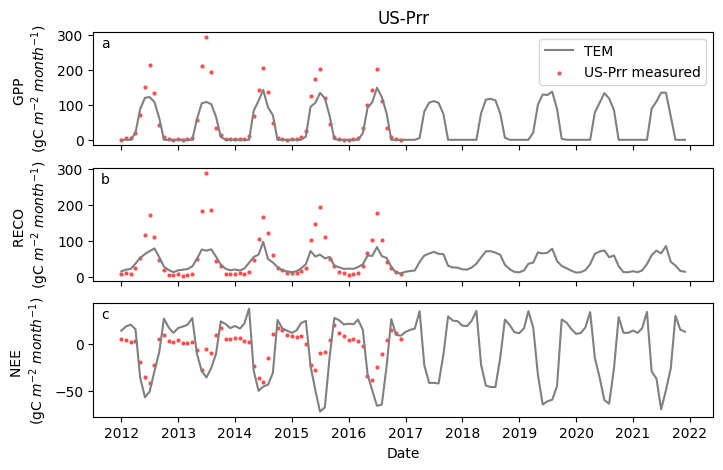

In [49]:
fig, axes = plt.subplots(3,1, figsize=(8,5), sharex=True)
axes[0].set(title='US-Prr', ylabel='GPP \n(gC $m^{-2}$ $month^{-1}$)')
sns.lineplot(data=tem_comparison_years, x='m_y', y='GPP', label = 'TEM', ax=axes[0], color='grey')
sns.scatterplot(data=station_years, x='m_y', y='GPP_filled', ax=axes[0], color='red', s=10, alpha=0.7, label='US-Prr measured')
#sns.scatterplot(data=met_data, x='m_y', y='(\'GPP_1_1_1\', \'sum\')', label = 'US-Prr measured', color='blue', ax=axes[0], alpha=0.7, s=10)


sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RG']+tem_comparison_years['RH']+tem_comparison_years['RM'], ax=axes[1], color='grey')
sns.scatterplot(data=station_years, x='m_y', y='RE_filled', ax=axes[1], color='red', s=10, alpha=0.7)
#sns.scatterplot(data=met_data, x='m_y', y='(\'RECO_1_1_1\', \'sum\')', ax=axes[1], color='blue', s=10, alpha=0.7)
#sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RG'], label = 'Growth Respiration')
#sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RM'], label = 'Maintenance Respiration')
#sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RH'], label = 'Heterotrophic Respiration - TEM', color='red', ax=axes[1])

sns.lineplot(data=tem_comparison_years, x='m_y', y=(tem_comparison_years['RG']+tem_comparison_years['RH']+tem_comparison_years['RM'])-tem_comparison_years['GPP'],ax=axes[2], color='grey')
sns.scatterplot(data=station_years, x='m_y', y='NEE_filled', color='red', alpha=0.7, s=10, ax=axes[2])
#sns.scatterplot(data=met_data, x='m_y', y=met_data['(\'RECO_1_1_1\', \'sum\')']-met_data['(\'GPP_1_1_1\', \'sum\')'], color='blue', alpha=0.7, s=10, ax=axes[2])

axes[1].set(ylabel='RECO \n(gC $m^{-2}$ $month^{-1}$)')
axes[2].set(ylabel='NEE \n(gC $m^{-2}$ $month^{-1}$)', xlabel='Date', )

axes[0].text(0.02, 0.9, 'a', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
axes[1].text(0.02, 0.9, 'b', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
axes[2].text(0.02, 0.9, 'c', horizontalalignment='center', verticalalignment='center', transform=axes[2].transAxes)

plt.savefig('US-Prr_carbon_flux.jpg', dpi=300)

In [17]:
#group by year and month, taking sum of daily ec measurements
ec_data_yearly = ec_data.groupby(by=['Year']).sum().reset_index() 

In [18]:
ec_data_yearly.head()

,Year,month,Unnamed: 0,DOY,H_filled,LE_filled,NEE_filled,GPP_filled,RE_filled,SW_IN,SW_OUT,LW_IN,LW_OUT,Rn,G
0,2010,78,66795,66795,-635.184406,147.205798,31.545236,7.274056,38.819292,183.887287,37.719372,13787.967306,14891.794778,-957.659558,-987.056351
1,2011,78,200020,66795,8643.536790,5711.972341,-73.883931,657.140177,583.256246,37514.785252,9776.120774,96059.767953,110223.303097,13575.129333,2478.533119
2,2012,78,333245,66795,7809.074347,5619.327771,-84.038069,652.622081,568.584012,35149.489607,8444.826140,91830.958715,105384.606058,13151.016124,-285.803253
3,2013,78,466470,66795,7557.495001,3377.634993,-0.605868,813.928876,813.323008,30130.089128,10290.709153,81907.682730,93112.494902,8634.567803,-948.434831
4,2014,78,599695,66795,4930.404028,5695.889441,-43.414209,628.190720,584.776511,38731.695307,10117.602887,98331.082986,112371.354138,14573.821267,1099.718547


In [19]:
np.nanmean(ec_data_yearly[ec_data_yearly['Year']>2010]['GPP_filled'])

683.1782537327999

Text(0.5, 0, 'Date')

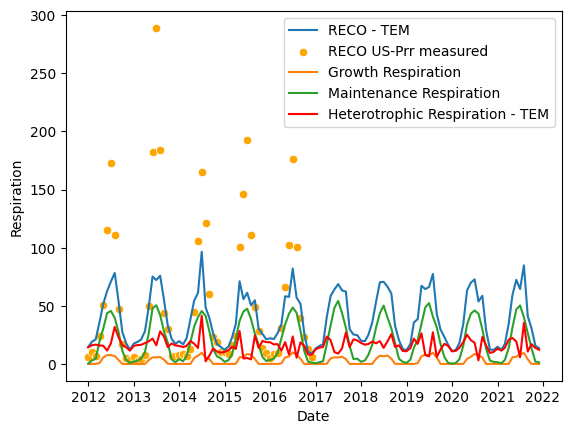

In [20]:
sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RG']+tem_comparison_years['RH']+tem_comparison_years['RM'], label = 'RECO - TEM')
sns.scatterplot(data=station_years, x='m_y', y='RE_filled', label = 'RECO US-Prr measured', color='orange')
sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RG'], label = 'Growth Respiration')
sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RM'], label = 'Maintenance Respiration')
sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RH'], label = 'Heterotrophic Respiration - TEM', color='red')

plt.ylabel('Respiration')
plt.xlabel('Date')
#plt.savefig('US-Prr_RECO.jpg', dpi=300)

<AxesSubplot:xlabel='m_y', ylabel='NEE_filled'>

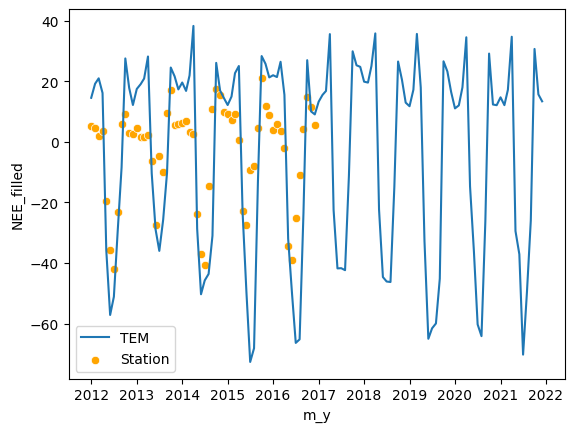

In [21]:
sns.lineplot(data=tem_comparison_years, x='m_y', y=(tem_comparison_years['RG']+tem_comparison_years['RH']+tem_comparison_years['RM'])-tem_comparison_years['GPP'], label = 'TEM')
sns.scatterplot(data=station_years, x='m_y', y='NEE_filled', label = 'Station', color='orange')

## Soil Water Content

In [22]:
#soil_layer_synth=pd.read_csv('/work/scripts/caribou-poker-exp/soil_layer_synthesis/layersytnth.csv')
soil_layer_synth=pd.read_csv('/work/scripts/caribou-poker-exp/soil_layer_synthesis/datastdz.csv')

In [23]:
soil_layer_synth = soil_layer_synth[(soil_layer_synth['x']==1) & (soil_layer_synth['y']==0)] #& (soil_layer_synth['z']==.1)]
soil_layer_synth['time'] = pd.to_datetime(soil_layer_synth['time'])
soil_layer_synth['year'] = pd.DatetimeIndex(soil_layer_synth['time']).year
soil_layer_synth['LWCLAYERtop'] = soil_layer_synth['LWCLAYERtop']*100
soil_layer_synth['LWCLAYERbot'] = soil_layer_synth['LWCLAYERbot']*100

In [24]:
len(soil_layer_synth[soil_layer_synth['year']==1901])

12

In [25]:
layer = 4

In [26]:
vwc_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/VWCLAYER_monthly_tr.nc')
#vwc_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/VWCLAYER_monthly_tr.nc')
vwc_ds = vwc_ds.convert_calendar('standard', use_cftime=True, align_on='date')
vwc = vwc_ds.variables['VWCLAYER'][:,:,cell_y_coord, cell_x_coord][:,layer]*100
print(vwc)

<xarray.Variable (time: 1452)>
array([26.00420275, 26.00420275, 26.00420275, ..., 48.9423449 ,
       52.01652031, 52.01652031])


In [27]:
lwc_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/LWCLAYER_monthly_tr.nc')
#lwc_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/LWCLAYER_monthly_tr.nc')
lwc_ds = lwc_ds.convert_calendar('standard', use_cftime=True, align_on='date')
lwc = lwc_ds.variables['LWCLAYER'][:,:,cell_y_coord, cell_x_coord][:,layer]*100
print(lwc)

<xarray.Variable (time: 1452)>
array([ 0.        ,  0.        ,  0.        , ..., 34.31398093,
        0.        ,  0.        ])


In [28]:
ts_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/TLAYER_monthly_tr.nc')
#ts_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/TLAYER_monthly_tr.nc')
ts_ds = ts_ds.convert_calendar('standard', use_cftime=True, align_on='date')
ts = ts_ds.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord][:,layer]
print(ts)

<xarray.Variable (time: 1452)>
array([-7.32496149, -8.80753472, -7.34309927, ..., -0.60490071,
       -4.91299467, -8.45205549])
Attributes:
    units:      degree_C
    long_name:  Temperature by layer


In [29]:
layertype_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/LAYERTYPE_monthly_tr.nc')
#layertype_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/LAYERTYPE_monthly_tr.nc')
layertype_ds = layertype_ds.convert_calendar('standard', use_cftime=True, align_on='date')
layertype = layertype_ds.variables['LAYERTYPE'][:,:,cell_y_coord, cell_x_coord]
print(layertype)

<xarray.Variable (time: 1452, layer: 22)>
array([[ 0.,  1.,  2., ..., nan, nan, nan],
       [ 0.,  1.,  2., ..., nan, nan, nan],
       [ 0.,  1.,  2., ..., nan, nan, nan],
       ...,
       [ 0.,  1.,  1., ...,  3., nan, nan],
       [ 0.,  1.,  1., ...,  3., nan, nan],
       [ 0.,  1.,  1., ...,  3., nan, nan]])
Attributes:
    units:      
    long_name:  0:moss 1:shlw 2:deep 3:mineral


In [30]:
layerdepth_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/LAYERDEPTH_monthly_tr.nc')
#layerdepth_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/LAYERDEPTH_monthly_tr.nc')
layerdepth_ds = layerdepth_ds.convert_calendar('standard', use_cftime=True, align_on='date')
layerdepth = layerdepth_ds.variables['LAYERDEPTH'][:,:,cell_y_coord, cell_x_coord][:,layer]
print(layerdepth)

<xarray.Variable (time: 1452)>
array([0.24508328, 0.24508328, 0.24508328, ..., 0.08280659, 0.08280659,
       0.08280659])
Attributes:
    units:      m
    long_name:  Layer depth from the surface


In [31]:
swc_dates = vwc_ds.indexes['time'].to_datetimeindex()
swc_df = pd.DataFrame({'date':swc_dates, 'vwc': vwc, 'lwc': lwc, 'ts': ts, 'layerdepth': layerdepth})

In [32]:
swc_df['month'] = pd.DatetimeIndex(swc_df['date']).month
swc_df['year'] = pd.DatetimeIndex(swc_df['date']).year
swc_df['m_y'] = pd.to_datetime(swc_df['month'].astype(str) + '-'+ swc_df['year'].astype(str), format='%m-%Y')

<AxesSubplot:xlabel='m_y', ylabel='layerdepth'>

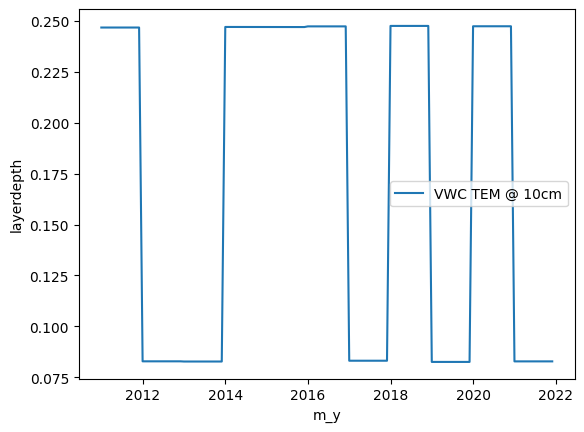

In [33]:
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='layerdepth', label='VWC TEM @ 10cm') #-0.1 m

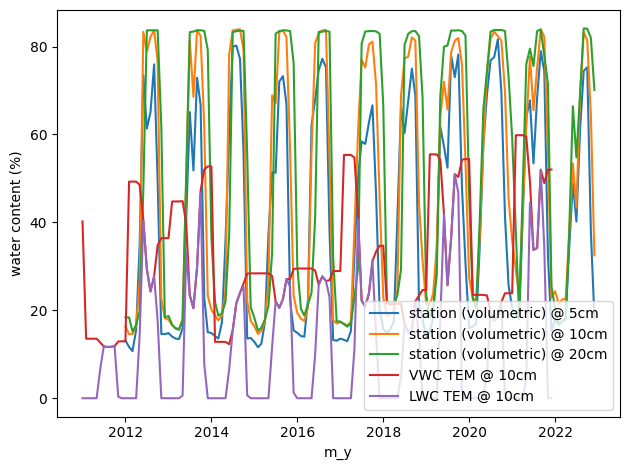

In [34]:
fig, ax = plt.subplots()
sns.lineplot(data = met_data, x='m_y', y='(\'SWC_1_1_1\', \'mean\')', label='station (volumetric) @ 5cm') #-0.05 m
sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='(\'SWC_1_2_1\', \'mean\')', label='station (volumetric) @ 10cm') #-0.1 m
sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='(\'SWC_1_3_1\', \'mean\')', label='station (volumetric) @ 20cm') #-0.2 m
#sns.lineplot(data = met_data, x='m_y', y='SWC_1_4_1') #-0.3 m
#sns.lineplot(data = met_data, x='m_y', y='SWC_1_5_1') #-0.4 m

#ax2 = plt.twinx()
#sns.lineplot(data=df.column2, color="b", ax=ax2)

sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='vwc', label='VWC TEM @ 10cm') #-0.1 m
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='lwc', label='LWC TEM @ 10cm') #-0.1 m
#sns.lineplot(data = soil_layer_synth.loc[soil_layer_synth['year']>2010], x='time', y='LWCLAYERtop', label='LWC TEM @ 10cm (script)') #-0.1 m
#sns.lineplot(data = soil_layer_synth.loc[soil_layer_synth['year']>2010], x='time', y='LWCLAYERbot', label='LWC TEM @ 10cm (script)') #-0.1 m


plt.ylabel('water content (%)')
plt.legend(loc='lower right')

fig.tight_layout()

<AxesSubplot:xlabel='m_y', ylabel="('TS_1_1_1', 'mean')">

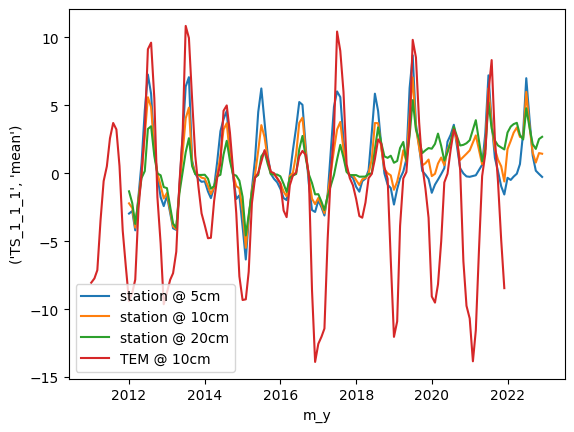

In [35]:
fig, ax = plt.subplots()
sns.lineplot(data = met_data, x='m_y', y='(\'TS_1_1_1\', \'mean\')', label='station @ 5cm') #-0.05 m
sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='(\'TS_1_2_1\', \'mean\')', label='station @ 10cm') #-0.1 m
sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='(\'TS_1_3_1\', \'mean\')', label='station @ 20cm') #-0.2 m
             
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y=swc_df.loc[swc_df['year']>2010]['ts'], label='TEM @ 10cm') #-0.1 m


<AxesSubplot:xlabel='ts', ylabel='RH'>

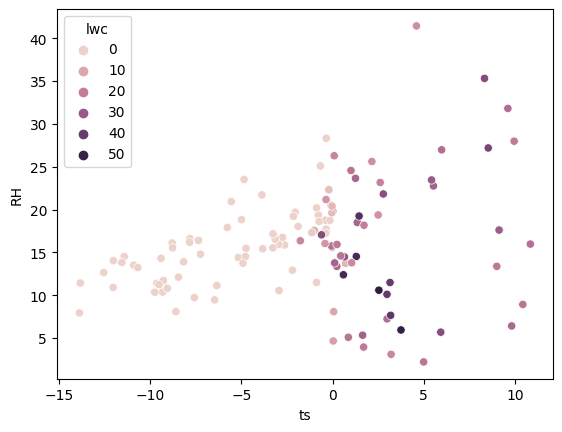

In [36]:
merged_df= pd.merge(tem_comparison_years, swc_df, on='date')
sns.scatterplot(x=merged_df['ts'], y=merged_df['RH'], hue=merged_df['lwc'])

(array([14975., 15340., 15706., 16071., 16436., 16801., 17167., 17532.,
        17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

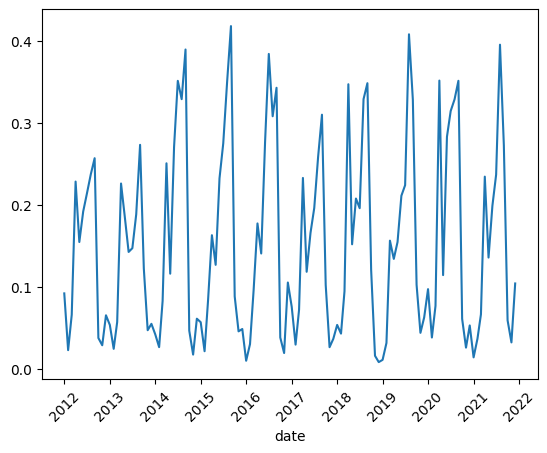

In [37]:
sns.lineplot(x=tem_comparison_years['date'], y=tem_comparison_years['EET']/tem_comparison_years['PET'])
plt.xticks(rotation = 45)

In [38]:
swc_df.head()

,date,vwc,lwc,ts,layerdepth,month,year,m_y
0,1901-01-01,26.004203,0.0,-7.324961,0.245083,1,1901,1901-01-01
1,1901-02-01,26.004203,0.0,-8.807535,0.245083,2,1901,1901-02-01
2,1901-03-01,26.004203,0.0,-7.343099,0.245083,3,1901,1901-03-01
3,1901-04-01,26.004203,0.0,-4.751106,0.245083,4,1901,1901-04-01
4,1901-05-01,26.004203,0.0,-0.740485,0.245083,5,1901,1901-05-01


In [39]:
met_data.columns.to_list()

['year',
 'month',
 "('TIMESTAMP_START', 'mean')",
 "('TIMESTAMP_START', 'std')",
 "('TIMESTAMP_START', 'sum')",
 "('TIMESTAMP_END', 'mean')",
 "('TIMESTAMP_END', 'std')",
 "('TIMESTAMP_END', 'sum')",
 "('USTAR_1_1_1', 'mean')",
 "('USTAR_1_1_1', 'std')",
 "('USTAR_1_1_1', 'sum')",
 "('USTAR_1_2_1', 'mean')",
 "('USTAR_1_2_1', 'std')",
 "('USTAR_1_2_1', 'sum')",
 "('WS_1_3_1', 'mean')",
 "('WS_1_3_1', 'std')",
 "('WS_1_3_1', 'sum')",
 "('WS_1_9_1', 'mean')",
 "('WS_1_9_1', 'std')",
 "('WS_1_9_1', 'sum')",
 "('FC_1_1_1', 'mean')",
 "('FC_1_1_1', 'std')",
 "('FC_1_1_1', 'sum')",
 "('FC_1_2_1', 'mean')",
 "('FC_1_2_1', 'std')",
 "('FC_1_2_1', 'sum')",
 "('H_1_1_1', 'mean')",
 "('H_1_1_1', 'std')",
 "('H_1_1_1', 'sum')",
 "('H_1_2_1', 'mean')",
 "('H_1_2_1', 'std')",
 "('H_1_2_1', 'sum')",
 "('LE_1_1_1', 'mean')",
 "('LE_1_1_1', 'std')",
 "('LE_1_1_1', 'sum')",
 "('LE_1_2_1', 'mean')",
 "('LE_1_2_1', 'std')",
 "('LE_1_2_1', 'sum')",
 "('SH_1_1_1', 'mean')",
 "('SH_1_1_1', 'std')",
 "('SH_1

In [40]:
met_data['mean_snow_depth'] = met_data[['(\'D_SNOW_1_1_2\', \'mean\')', '(\'D_SNOW_1_1_3\', \'mean\')']].mean(axis=1)

Text(0, 0.5, 'snow depth (cm)')

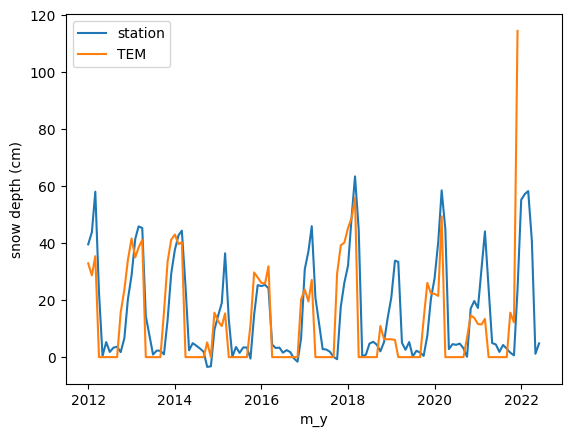

In [41]:
fig, ax = plt.subplots()
sns.lineplot(data =  met_data.loc[met_data['year']>2010], x='m_y', y='mean_snow_depth', label='station') #-0.05 m
             
sns.lineplot(data = tem_comparison_years, x='m_y', y=tem_comparison_years['SNOWTHICK']*100, label='TEM') #-0.1 m

plt.ylabel('snow depth (cm)')

In [42]:
met_data.columns

Index(['year', 'month', '('TIMESTAMP_START', 'mean')',
       '('TIMESTAMP_START', 'std')', '('TIMESTAMP_START', 'sum')',
       '('TIMESTAMP_END', 'mean')', '('TIMESTAMP_END', 'std')',
       '('TIMESTAMP_END', 'sum')', '('USTAR_1_1_1', 'mean')',
       '('USTAR_1_1_1', 'std')',
       ...
       '('GPP_1_2_1', 'std')', '('GPP_1_2_1', 'sum')',
       '('RECO_1_2_1', 'mean')', '('RECO_1_2_1', 'std')',
       '('RECO_1_2_1', 'sum')', '('year', 'mean')', '('year', 'std')',
       '('year', 'sum')', 'm_y', 'mean_snow_depth'],
      dtype='object', length=277)

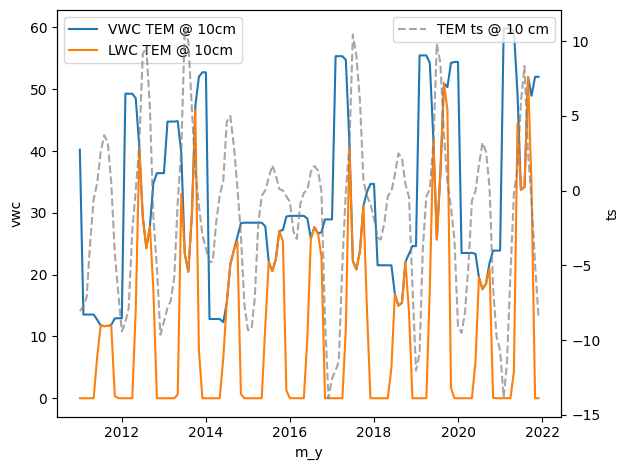

In [43]:
fig, ax = plt.subplots()
#sns.lineplot(data = met_data, x='m_y', y='TS_1_1_1', label='station @ 5cm') #-0.05 m
#sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='TS_1_2_1', label='station @ 10cm') #-0.1 m
#sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='TS_1_3_1', label='station @ 20cm') #-0.2 m
             
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='vwc', label='VWC TEM @ 10cm') #-0.1 m
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='lwc', label='LWC TEM @ 10cm') #-0.1 m
#sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y=swc_df.loc[swc_df['year']>2010]['lwc']*1.09, 
#             label='LWC (all ice) TEM @ 10cm', color='orange', alpha=0.5, linestyle='--') #-0.1 m

ax2 = ax.twinx()


sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y=swc_df.loc[swc_df['year']>2010]['ts'], label='TEM ts @ 10 cm', 
             ax=ax2, color='grey', alpha=0.7, linestyle = '--') #-0.1 m
fig.tight_layout()
#plt.ylabel('soil temperature ($^\circ$C)')

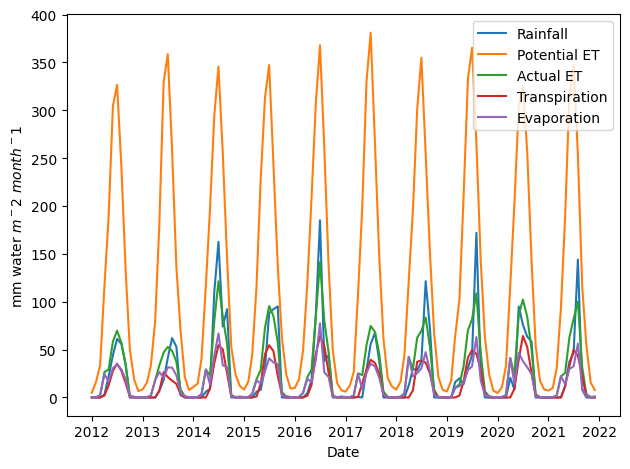

In [44]:
fig, ax = plt.subplots()
sns.lineplot(data=tem_comparison_years, x='m_y', y='RAINFALL', label = 'Rainfall')
sns.lineplot(data=tem_comparison_years, x='m_y', y='PET', label = 'Potential ET')
sns.lineplot(data=tem_comparison_years, x='m_y', y='EET', label = 'Actual ET')
sns.lineplot(data=tem_comparison_years, x='m_y', y='TRANSPIRATION', label = 'Transpiration')
sns.lineplot(x=tem_comparison_years['m_y'], y=tem_comparison_years['EET']-tem_comparison_years['TRANSPIRATION'], label = 'Evaporation')
plt.ylabel('mm water $m^-2$ $month^-1$')
plt.xlabel('Date')
fig.tight_layout()

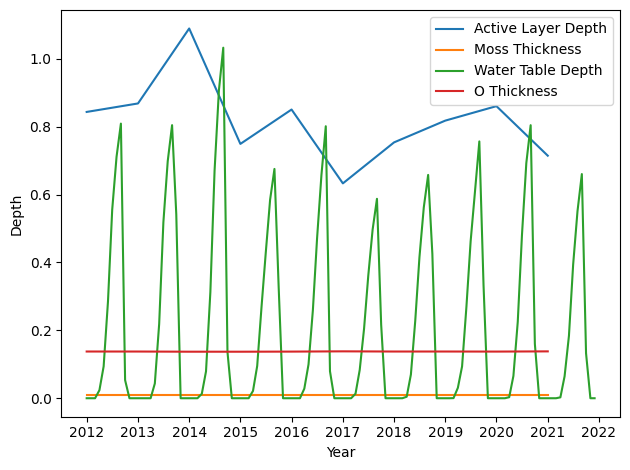

In [45]:
fig, ax = plt.subplots()
sns.lineplot(data=yearly_tem_comparison_years, x='date', y='ALD', label = 'Active Layer Depth')
sns.lineplot(data=yearly_tem_comparison_years, x='date', y='MOSSDZ', label = 'Moss Thickness')
sns.lineplot(data=tem_comparison_years, x='date', y='WATERTAB', label = 'Water Table Depth')
sns.lineplot(x=yearly_tem_comparison_years['date'], y=yearly_tem_comparison_years['SHLWDZ']+yearly_tem_comparison_years['DEEPDZ'], label = 'O Thickness')

#sns.lineplot(data=tem_comparison_years, x='m_y', y='PET', label = 'Potential ET')
#sns.lineplot(data=tem_comparison_years, x='m_y', y='EET', label = 'Actual ET')
#sns.lineplot(data=tem_comparison_years, x='m_y', y='TRANSPIRATION', label = 'Transpiration')
#sns.lineplot(x=tem_comparison_years['m_y'], y=tem_comparison_years['EET']-tem_comparison_years['TRANSPIRATION'], label = 'Evaporation')
#plt.ylabel('mm water $m^-2$ $month^-1$')
plt.xlabel('Year')
plt.ylabel('Depth')
fig.tight_layout()

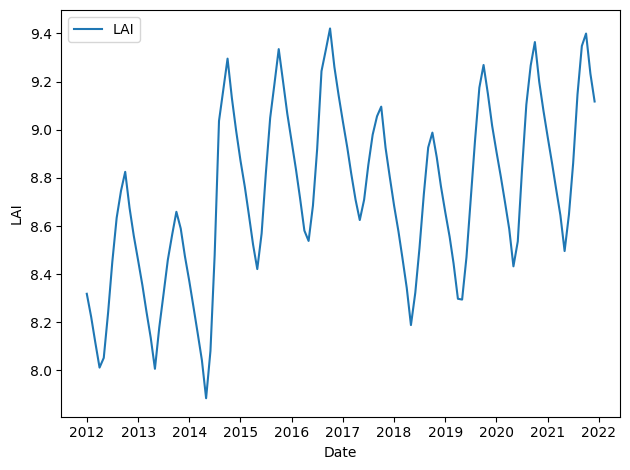

In [46]:
fig, ax = plt.subplots()
sns.lineplot(data=tem_comparison_years, x='m_y', y='LAI', label = 'LAI')

plt.xlabel('Date')
fig.tight_layout()

<AxesSubplot:xlabel='date', ylabel='ALD'>

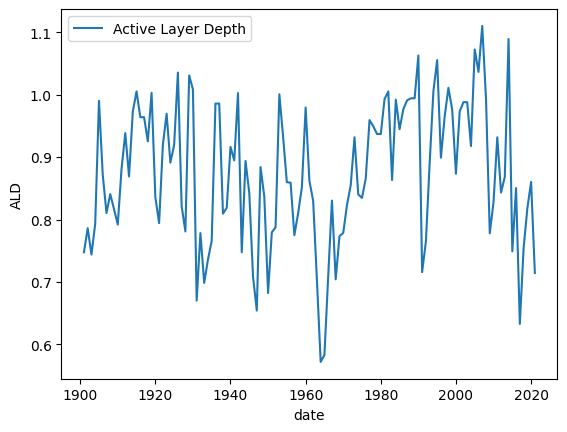

In [47]:
fig, ax = plt.subplots()
sns.lineplot(data=tem_output_df_yearly, x='date', y='ALD', label = 'Active Layer Depth')
